# Weather Correlations

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
crimes_df = pd.read_csv('../data/Crimes.csv', parse_dates=['FIRST_OCCURRENCE_DATE', 'LAST_OCCURRENCE_DATE', 'REPORTED_DATE'])
weather_df = pd.read_csv('../data/Weather.csv', parse_dates=['datetime'])

/var/folders/mk/ykv3j_d10z7fbbylyxfw79ym0000gn/T/ipykernel_83353/2600881369.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crimes_df = pd.read_csv('../data/Crimes.csv', parse_dates=['FIRST_OCCURRENCE_DATE', 'LAST_OCCURRENCE_DATE', 'REPORTED_DATE'])


Are auto thefts more likely to occur on snowy days?

In [7]:
crimes_df['DATE'] = crimes_df['FIRST_OCCURRENCE_DATE'].dt.date
weather_df['DATE'] = weather_df['datetime'].dt.date
merged_df = pd.merge(left=crimes_df, right=weather_df, on='DATE', how='inner')

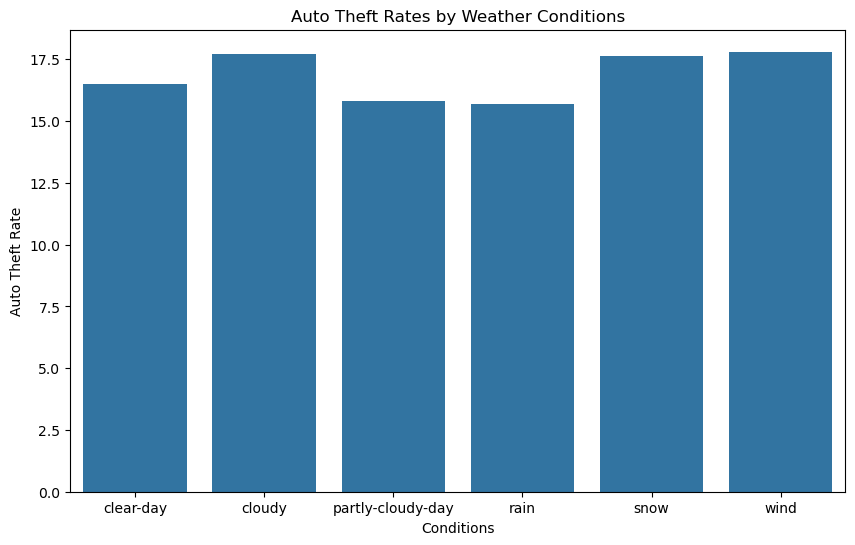

In [12]:
weather_days_df = merged_df.groupby('icon').size().reset_index(name='count')
auto_theft_df= merged_df[merged_df['OFFENSE_CATEGORY_ID'].isin(['auto-theft'])].groupby('icon').size().reset_index(name='count')

auto_theft_df['rate'] = ((auto_theft_df['count'] / weather_days_df['count']) * 100).round(2)

plt.figure(figsize=(10, 6))

sns.barplot(data=auto_theft_df, x='icon', y='rate')

plt.title('Auto Theft Rates by Weather Conditions')
plt.xlabel('Conditions')
plt.ylabel('Auto Theft Rate')

plt.show()

Do aggrevated assaults occur more frequently on days with extreme temperatures?

In [18]:
def categorize_temperature(x):
  if x < 32.0:
    return 'Cold'
  elif x > 80.0:
    return 'Hot'
  return 'Mild'

merged_df['temperature_category'] = merged_df['temp'].apply(categorize_temperature)

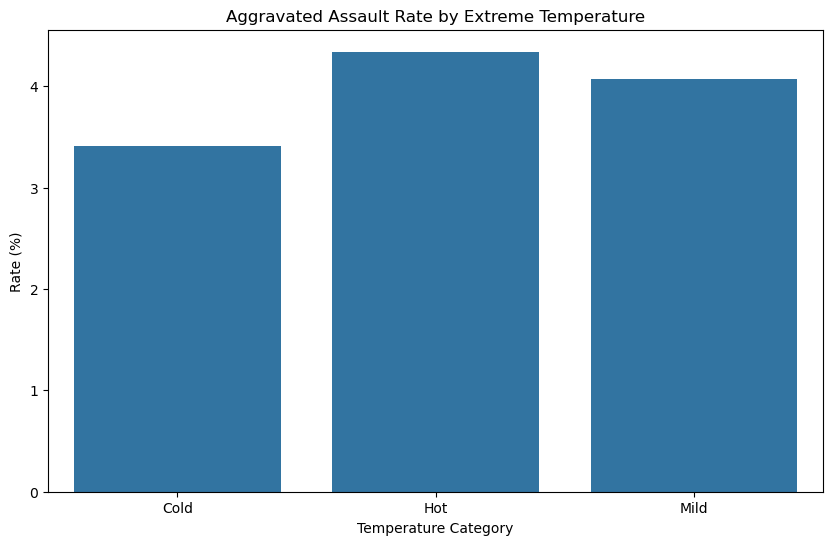

In [21]:
temp_category_df = merged_df.groupby('temperature_category').size().reset_index(name='count')
agg_assaults_temp_df = merged_df[merged_df['OFFENSE_CATEGORY_ID'].isin(['aggravated-assault'])].groupby('temperature_category').size().reset_index(name='count')

agg_assaults_temp_df['rate'] = ((agg_assaults_temp_df['count'] / temp_category_df['count']) * 100).round(2)

plt.figure(figsize=(10, 6))

sns.barplot(data=agg_assaults_temp_df, x='temperature_category', y='rate')

plt.title('Aggravated Assault Rate by Extreme Temperature')
plt.xlabel('Temperature Category')
plt.ylabel('Rate (%)')

plt.show()